# Gender Classification

## Overview

This is the code for the gender classification challenge for 'Learn Python for Data Science #1' by @Sirajology on YouTube. The code uses the scikit-learn machine learning library to train a decision tree on a small dataset of body metrics (height and shoe size) labeled male or female. Then we can predict the gender of someone given a novel set of body metrics.

## Challenge

Find 3 more classifiers from the sci-kit learn documentation and add them to the demo.py code. Train them on the same dataset and compare their results. You can determine accuracy by trying to predict testing you trained classifier on samples from the training data and see if it correctly classifies it.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB

## Importing Dataset

In [3]:
dataset = pd.read_csv('gender.csv')

In [4]:
dataset.head()

,Size,Height,Gender
0,5.5,60.0,Female
1,6.0,60.0,Female
2,7.0,60.0,Female
3,8.0,60.0,Female
4,8.0,60.0,Female


In [5]:
dataset.shape

(408, 3)

## Dummy variables conversion into 0 and 1

In [6]:
dataset['sex']=dataset.Gender.map({'Female':0 , 'Male':1})

In [7]:
dataset.head()

,Size,Height,Gender,sex
0,5.5,60.0,Female,0
1,6.0,60.0,Female,0
2,7.0,60.0,Female,0
3,8.0,60.0,Female,0
4,8.0,60.0,Female,0


## Splitting the dataset into the Dependent "y" and Independent "X" variables

In [8]:
X= dataset[["Size" , "Height"]]
y=dataset.sex

In [9]:
X.shape

(408, 2)

In [10]:
y.shape

(408,)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
X_train.shape

(326, 2)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Given classifiers

In [14]:
clf = tree.DecisionTreeClassifier()
clf1 = svm.SVC()
clf2 = neighbors.KNeighborsClassifier()
clf3 = GaussianNB()

## Fitting classifier to the Training set

In [15]:
clf = clf.fit(X_train,y_train)
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)

# Predicting results for Decision Tree

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

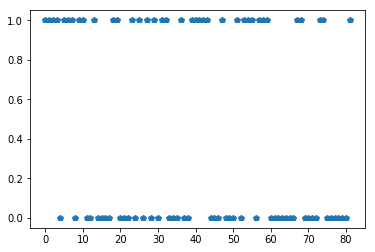

In [18]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

In [19]:
y_test.head()

241    1
298    1
300    1
351    1
102    0
Name: sex, dtype: int64

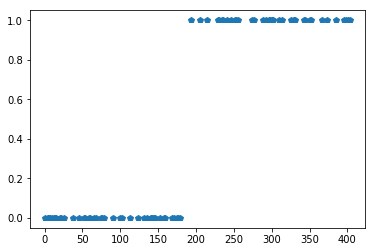

In [20]:
plt.plot(y_test, "p")

## Visualizing the Training set results

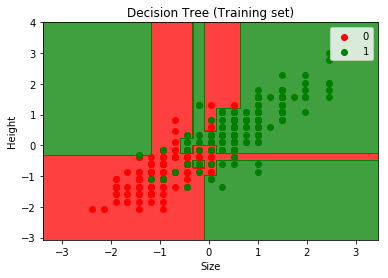

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

## Visualizing the Test set results

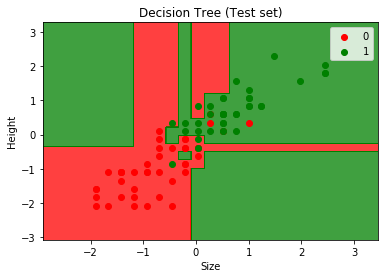

In [22]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

# Predicting for SVM

In [23]:
y_pred1 = clf1.predict(X_test)

In [24]:
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

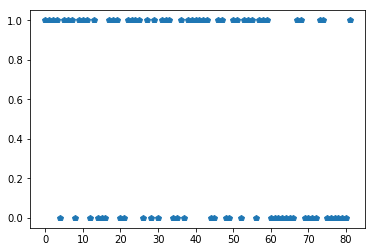

In [25]:
plt.plot(y_pred1, "p")

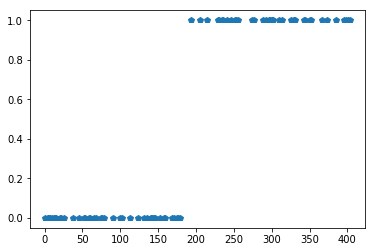

In [26]:
plt.plot(y_test, "p")

## Visualizing the Training set results

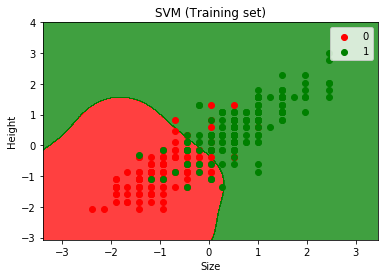

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Training set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

## Visualizing the Test set results

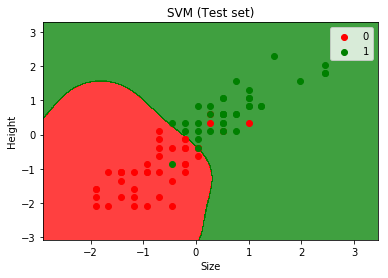

In [28]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

# Predicting results for KNN

In [29]:
y_pred2 = clf2.predict(X_test)

In [30]:
y_pred2

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

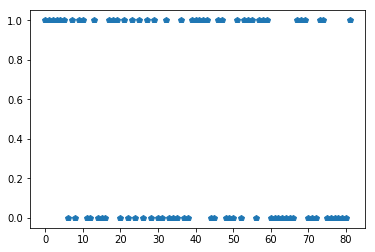

In [31]:
plt.plot(y_pred2, "p")

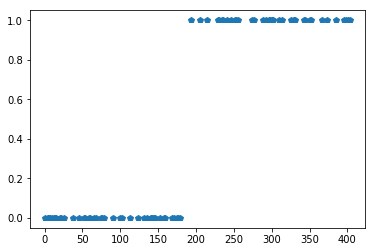

In [32]:
plt.plot(y_test, "p")

## Visualizing the Training set results

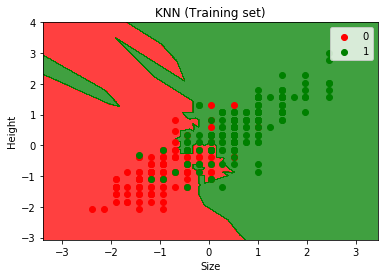

In [33]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Training set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

## Visualizing the Test set results

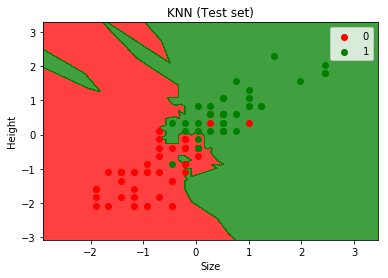

In [34]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Test set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

# Predicting Naive Bayes

In [35]:
y_pred3 = clf3.predict(X_test)

In [36]:
y_pred3

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

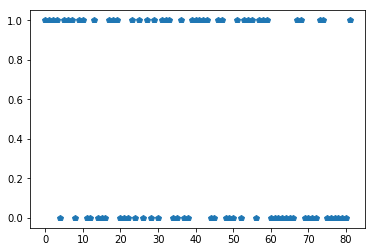

In [37]:
plt.plot(y_pred3, "p")

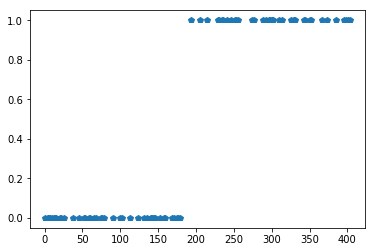

In [38]:
plt.plot(y_test, "p")

## Visualizing the Training set results

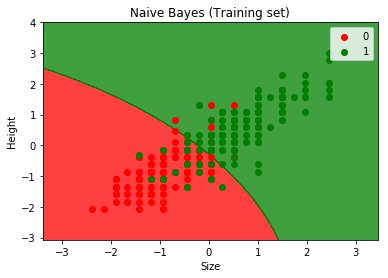

In [39]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

## Visualizing the Test set results

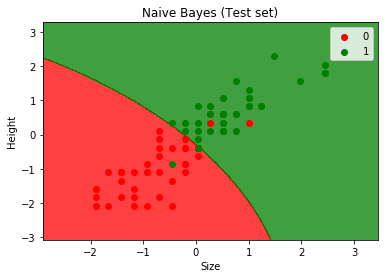

In [40]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Size')
plt.ylabel('Height')
plt.legend()
plt.show()

# Confusion Matrix for each classification

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  4],
       [ 5, 33]], dtype=int64)

In [42]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[36,  8],
       [ 1, 37]], dtype=int64)

In [43]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[37,  7],
       [ 5, 33]], dtype=int64)

In [44]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[40,  4],
       [ 2, 36]], dtype=int64)

# Accuracy for all 

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8902439024390244

In [46]:
accuracy_score(y_test, y_pred1)

0.8902439024390244

In [47]:
accuracy_score(y_test, y_pred2)

0.8536585365853658

In [48]:
accuracy_score(y_test, y_pred3)

0.926829268292683

**In terms of accuracy, Naive Bayes is a clear winner with 92% accurate prediction**